In [283]:
import matplotlib.pyplot as plt
import seaborn as sns
import arch.data.sp500
import numpy as np
import pandas as pd
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
import vartests
from arch.univariate import APARCH
from statsmodels.tsa.stattools import adfuller
import datetime
import pylab 
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

# General Data

In [284]:
#Read Data and create variable Returns
data = pd.read_csv("^IBEX_Jan2004_Feb2014.csv", index_col = 0)
data.index = pd.to_datetime(data.index, infer_datetime_format=True)
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()
print(returns)

Date
2004-01-05    0.408668
2004-01-06    0.000000
2004-01-07    0.029076
2004-01-08    0.375295
2004-01-09   -0.236672
                ...   
2014-01-27   -1.119680
2014-01-28    1.236876
2014-01-29    0.173099
2014-01-30    0.690163
2014-01-31   -0.444577
Name: Adj Close, Length: 2584, dtype: float64


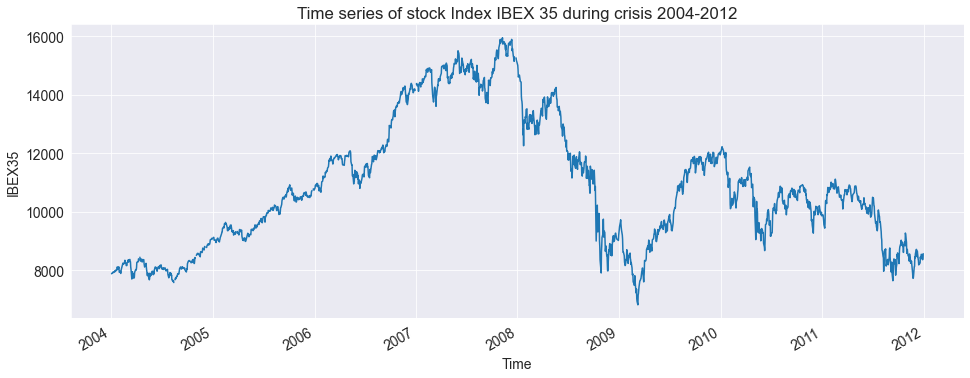

In [285]:
#Ibex 35 during crisis plot
data.Close[:"2011"].plot()
plt.xlabel('Time')
plt.ylabel('IBEX35')
plt.title("Time series of stock Index IBEX 35 during crisis 2004-2012")
plt.show()

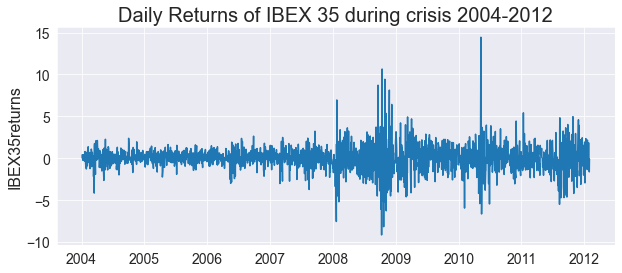

In [286]:
#Create variable RET --> Only from 2004 until 2012
ret = returns.loc[datetime.date(year=2004,month=1,day=1):datetime.date(year=2012,month=1,day=31)]
plt.figure(figsize=(10,4))
plt.plot(ret)
plt.ylabel('IBEX35returns', fontsize=16)
plt.title('Daily Returns of IBEX 35 during crisis 2004-2012', fontsize=20)
plt.show()
#There is a high volatitlity, specially between 2008 and 2011

In [287]:
#Check Stationarity
res_diff =  adfuller(ret)
print(f'ADF Test p-value: {res_diff[1]}')
#If p-value below 0.05 means, that the returns are stationary 

ADF Test p-value: 2.838903916069182e-18


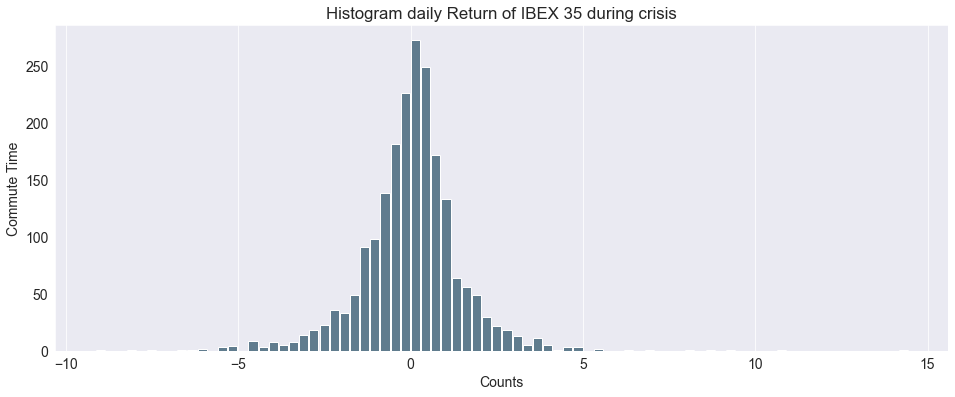

In [288]:
#Representation of the RET Data
ret.plot.hist(grid=True, bins=80, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram daily Return of IBEX 35 during crisis')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

In [289]:
#Normality check: Lillifors test
lilliefors(ret, dist='norm', pvalmethod='approx')
#If p-value is below 0.05, that means it isn´t normally distributed (second value)

(0.08642411035351893, 2.611975721379038e-41)

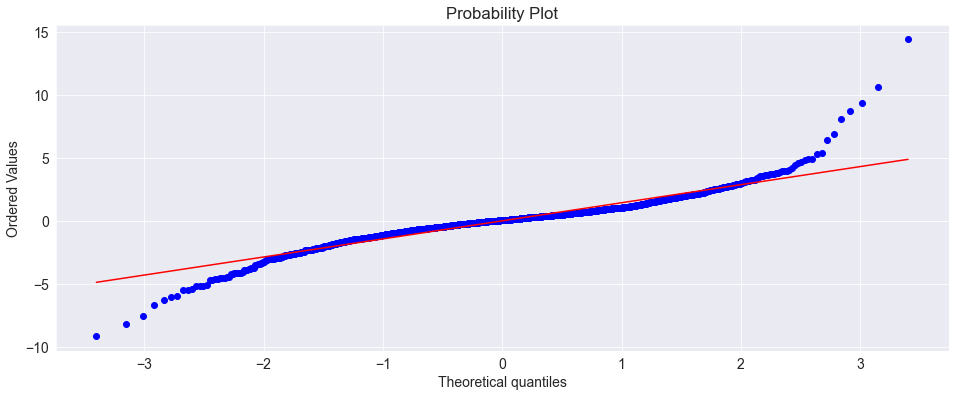

In [290]:
# QQ Plot of the RET values
stats.probplot(ret, dist="norm", plot=pylab)
pylab.show()

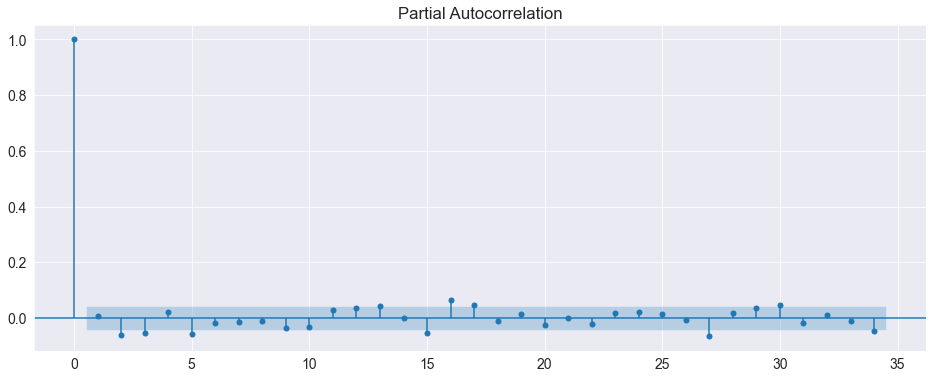

In [291]:
#With PACF see possible spikes: AR 
plot_pacf(ret)
plt.show()

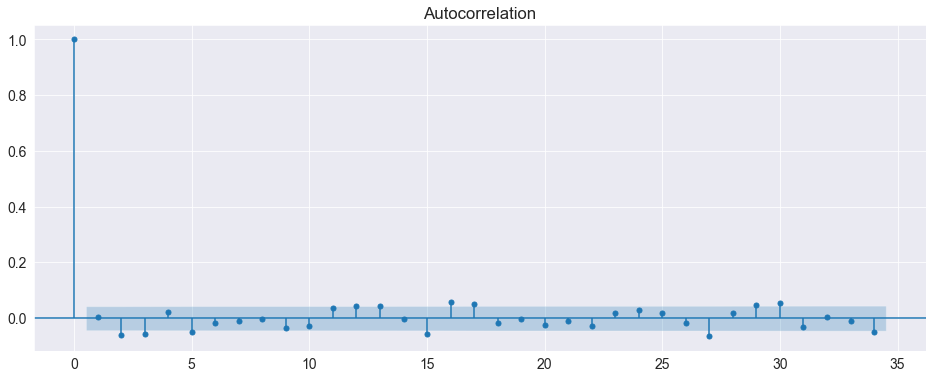

In [292]:
#With ACF see possible spikes: MA 
plot_acf(ret)
plt.show()

In [293]:
# Check best number of parameters in an ARMA model
print("AIC")
num = [0,1,2,3,4,5]
for x in num : 
    for y in num : 
        arma_mod20 = ARIMA(ret, order=(x, 0, y)).fit()
        print("ARMA", x , y ,":", arma_mod20.aic)
        
#ARMA (2,5) Model is chosen

AIC
ARMA 0 0 : 7589.492561528097
ARMA 0 1 : 7591.408590721977
ARMA 0 2 : 7586.2349129900385
ARMA 0 3 : 7579.849548687099
ARMA 0 4 : 7581.131924778456
ARMA 0 5 : 7577.4223992911175
ARMA 1 0 : 7591.4186493391635
ARMA 1 1 : 7585.359507354342
ARMA 1 2 : 7580.497096304628
ARMA 1 3 : 7579.132204025807
ARMA 1 4 : 7581.056137955959
ARMA 1 5 : 7578.589155204809
ARMA 2 0 : 7585.866514600969
ARMA 2 1 : 7580.432085258371
ARMA 2 2 : 7582.429601305756
ARMA 2 3 : 7580.262869613395
ARMA 2 4 : 7580.553788277906
ARMA 2 5 : 7570.1034546258
ARMA 3 0 : 7581.602599993222
ARMA 3 1 : 7580.369894791071
ARMA 3 2 : 7581.509166795073
ARMA 3 3 : 7578.558629570547
ARMA 3 4 : 7579.087863911842
ARMA 3 5 : 7577.388089198199
ARMA 4 0 : 7582.808690581351
ARMA 4 1 : 7582.369809856112
ARMA 4 2 : 7581.2422328384755
ARMA 4 3 : 7573.547106480946
ARMA 4 4 : 7581.273700983523
ARMA 4 5 : 7582.413381717253
ARMA 5 0 : 7578.014672591604
ARMA 5 1 : 7578.200621932475
ARMA 5 2 : 7578.154633265441
ARMA 5 3 : 7576.987948530006
ARMA 5 4

In [294]:
# Check best number of parameters in a GARCH model
print("BIC: GARCH Model")
num = [0,1,2,3,4]
for x in num : 
    for y in num : 
        arch_mod20 = arch_model(ret, vol="Garch", p=(x+1), o=0, q=y, dist="skewt")
        aes = arch_mod20.fit(disp="off", last_obs="2010-01-01")
        print("GARCH", x+1 , y ,":", aes.bic)
        
#Model GARCH (1,1) is chosen

BIC: GARCH Model
GARCH 1 0 : 4810.503498351291
GARCH 1 1 : 4503.3607704964825
GARCH 1 2 : 4510.699008513531
GARCH 1 3 : 4518.037247024623
GARCH 1 4 : 4525.375484794549
GARCH 2 0 : 4715.385884158925
GARCH 2 1 : 4510.023669208818
GARCH 2 2 : 4515.303202345287
GARCH 2 3 : 4522.641487258851
GARCH 2 4 : 4529.979678220328
GARCH 3 0 : 4651.597535438123
GARCH 3 1 : 4517.361907638405
GARCH 3 2 : 4522.634276397664
GARCH 3 3 : 4531.82076913478
GARCH 3 4 : 4538.619047073469
GARCH 4 0 : 4604.868899957359
GARCH 4 1 : 4524.700145436435
GARCH 4 2 : 4529.823645258327
GARCH 4 3 : 4537.161891265181
GARCH 4 4 : 4543.891618657934
GARCH 5 0 : 4579.496682971919
GARCH 5 1 : 4532.038384071149
GARCH 5 2 : 4537.161883155399
GARCH 5 3 : 4544.500121120872
GARCH 5 4 : 4551.213864996789


In [295]:
# Check best number of parameters in a GJR GARCH model
print("BIC: GJR GARCH Model")
num = [0,1,2,3,4]
for x in num : 
    for y in num : 
        arch_mod20 = arch_model(ret, vol="Garch", p=(x), o=1, q=y+1, dist="skewt")
        aes = arch_mod20.fit(disp="off", last_obs="2010-01-01")
        print("GJR GARCH", x , y+1 ,":", aes.bic)
        
#Model GJR GARCH (0,1) is chosen

BIC: GJR GARCH Model
GJR GARCH 0 1 : 4458.722885668282
GJR GARCH 0 2 : 4466.02786342871
GJR GARCH 0 3 : 4472.864215232252
GJR GARCH 0 4 : 4479.328923469622
GJR GARCH 0 5 : 4484.494098213254
GJR GARCH 1 1 : 4466.060348202119
GJR GARCH 1 2 : 4473.366101272725
GJR GARCH 1 3 : 4480.2024528822285
GJR GARCH 1 4 : 4486.6671616505755
GJR GARCH 1 5 : 4491.832336418809
GJR GARCH 2 1 : 4473.108261839812
GJR GARCH 2 2 : 4480.431123720343
GJR GARCH 2 3 : 4487.352726370895
GJR GARCH 2 4 : 4493.913432696856
GJR GARCH 2 5 : 4499.168540405294
GJR GARCH 3 1 : 4479.475336914611
GJR GARCH 3 2 : 4486.812836676611
GJR GARCH 3 3 : 4493.7448632332525
GJR GARCH 3 4 : 4500.337406678342
GJR GARCH 3 5 : 4505.513909980616
GJR GARCH 4 1 : 4485.907790479792
GJR GARCH 4 2 : 4493.2460288752045
GJR GARCH 4 3 : 4500.3454436719385
GJR GARCH 4 4 : 4506.773364658811
GJR GARCH 4 5 : 4512.182811268054


In [296]:
# Check best number of parameters in an EGARCH model
print("BIC: EGARCH Model")
num = [0,1,2,3,4]
for x in num : 
    for y in num : 
        arch_mod20 = arch_model(ret, vol="EGarch", p=(x+1), o=0, q=y, dist="skewt")
        aes = arch_mod20.fit(disp="off", last_obs="2010-01-01")
        print("EGARCH", x+1 , y ,":", aes.bic)
        
#Model EGARCH (1,1) is chosen

BIC: EGARCH Model
EGARCH 1 0 : 4836.776588309555
EGARCH 1 1 : 4510.060916726062
EGARCH 1 2 : 4517.399154833757
EGARCH 1 3 : 4524.7373933175695
EGARCH 1 4 : 4531.98333604336
EGARCH 2 0 : 4793.280895740764
EGARCH 2 1 : 4517.033526845541
EGARCH 2 2 : 4524.340566331167
EGARCH 2 3 : 4531.257830114516
EGARCH 2 4 : 4538.5960697657665
EGARCH 3 0 : 4750.93241873094
EGARCH 3 1 : 4524.086286814517
EGARCH 3 2 : 4531.704031790867
EGARCH 3 3 : 4537.5205366517675
EGARCH 3 4 : 4543.336193858127
EGARCH 4 0 : 4717.400349695854
EGARCH 4 1 : 4526.99335720705
EGARCH 4 2 : 4534.3315953643705
EGARCH 4 3 : 4541.669833494647
EGARCH 4 4 : 4548.739596816124
EGARCH 5 0 : 4695.439348772992
EGARCH 5 1 : 4533.583690083264
EGARCH 5 2 : 4540.014574251342
EGARCH 5 3 : 4547.352812307738
EGARCH 5 4 : 4555.385159113309


In [297]:
# Check best number of parameters in an APARCH model
print("BIC: APARCH Model")
num = [0,1,2,3,4]
for x in num : 
    for y in num : 
        arch_mod20 = arch_model(ret, vol="Aparch", p=(x+1), o=1, q=y, dist="skewt")
        aes = arch_mod20.fit(disp="off", last_obs="2010-01-01")
        print("APARCH", x+1 , y ,":", aes.bic)
        
#Model APARCH (1,1) is chosen

BIC: APARCH Model
APARCH 1 0 : 4808.7725512998295
APARCH 1 1 : 4466.979794016887
APARCH 1 2 : 4474.211371441335
APARCH 1 3 : 4480.486515578414
APARCH 1 4 : 4486.246254870135
APARCH 2 0 : 4714.029768000054
APARCH 2 1 : 4473.0349664537325
APARCH 2 2 : 4480.206128271665
APARCH 2 3 : 4486.3356427574545
APARCH 2 4 : 4492.1564053259635
APARCH 3 0 : 4650.243455475805
APARCH 3 1 : 4479.124250567742
APARCH 3 2 : 4486.354690547735
APARCH 3 3 : 4492.33834536433
APARCH 3 4 : 4498.022559685035
APARCH 4 0 : 4608.491443805731
APARCH 4 1 : 4486.001555016909
APARCH 4 2 : 4493.310088803637
APARCH 4 3 : 4499.583887106142
APARCH 4 4 : 4505.071158417196
APARCH 5 0 : 4583.647085324477
APARCH 5 1 : 4492.7025311650095
APARCH 5 2 : 4500.034500701557
APARCH 5 3 : 4506.32913488136
APARCH 5 4 : 4512.171871198374


# Compare Distributions

In [298]:
#Check Garch(1,1)
vec = ["normal", "studentst", "skewt"]

for i in vec :
    temp = arch_model(ret, vol="Garch", p=1, o=0, q=1, dist=i)
    result = temp.fit(disp="off", last_obs="2010-01-01")
    print("BIC (",i, ") :" , result.bic)
    
#Skewt is the best option

BIC ( normal ) : 4564.187433069707
BIC ( studentst ) : 4504.547757418592
BIC ( skewt ) : 4503.3607704964825


In [299]:
#Check GJR Garch(0,1)
vec = ["normal", "studentst", "skewt"]

for i in vec :
    temp = arch_model(ret, vol="Garch", p=(0), o=1, q=1, dist=i)
    result = temp.fit(disp="off", last_obs="2010-01-01")
    print("BIC (",i, ") :" , result.bic)
    
#Skewt is the best option

BIC ( normal ) : 4501.927446797728
BIC ( studentst ) : 4463.441756226898
BIC ( skewt ) : 4458.722885668282


In [300]:
#Check EGarch(1,1)
vec = ["normal", "studentst", "skewt"]

for i in vec :
    temp = arch_model(ret, vol="EGarch", p=1, o=0, q=1, dist=i)
    result = temp.fit(disp="off", last_obs="2010-01-01")
    print("BIC (",i, ") :" , result.bic)
    
#Skewt is the best option

BIC ( normal ) : 4578.270058834479
BIC ( studentst ) : 4510.527190850726
BIC ( skewt ) : 4510.060916726062


In [301]:
#Check Aparch(1,1)
vec = ["normal", "studentst", "skewt"]

for i in vec :
    temp = arch_model(ret, vol="Aparch", p=1, o=1, q=1, dist=i)
    result = temp.fit(disp="off", last_obs="2010-01-01")
    print("BIC (",i, ") :" , result.bic)
    
#Skewt is the best option

BIC ( normal ) : 4509.063893845337
BIC ( studentst ) : 4473.103917354161
BIC ( skewt ) : 4466.979794016887


# Forecast Data from 2010 to 2012

## GARCH (1,1) Model

In [302]:
# Create GARCH (1,1) model
am = arch_model(ret, vol="Garch", p=1, o=0, q=1, dist="skewt")
res = am.fit(disp="off", last_obs="2010-01-01")

In [303]:
print(res.summary())

                           Constant Mean - GARCH Model Results                           
Dep. Variable:                         Adj Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -2229.67
Distribution:      Standardized Skew Student's t   AIC:                           4471.33
Method:                       Maximum Likelihood   BIC:                           4503.36
                                                   No. Observations:                 1538
Date:                           Mon, Mar 28 2022   Df Residuals:                     1537
Time:                                   10:36:39   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

In [304]:
#Calculate values of the forecasted mean, variance and quantiles for VaR
forecasts = res.forecast(start="2010-1-1", reindex=False )
cond_mean = forecasts.mean["2010":]
cond_var = forecasts.variance["2010":]
q = am.distribution.ppf([0.01, 0.05], res.params[-2:])
print(q)

[-2.67794615 -1.66945094]


In [305]:
print(ret["2010":"2012-01-31"])

Date
2010-01-04    1.717746
2010-01-05    0.488270
2010-01-06    0.148304
2010-01-07   -0.459810
2010-01-08   -0.027123
                ...   
2012-01-25   -0.419024
2012-01-26    1.851457
2012-01-27   -0.648397
2012-01-30   -1.620597
2012-01-31   -0.091579
Name: Adj Close, Length: 535, dtype: float64


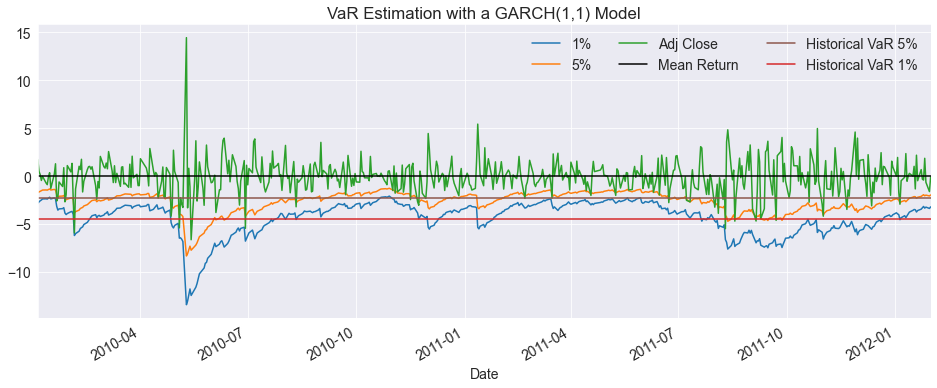

In [308]:
# Plot the real returns in comparison to the VaR estimation
value_at_risk = cond_mean.values + np.sqrt(cond_var).values * q[None, :]
value_at_risk = pd.DataFrame(value_at_risk, columns=["1%", "5%"], index=cond_var.index)
ax = value_at_risk.plot(legend=False)
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])
rets_2010 = ret["2010":"2012-01-31"].copy()
ax1 = rets_2010.plot(legend=False)
xl1 = ax.set_xlim(rets_2010.index[0])
rets_2010.name = "IBEX35 Return"
ax.set_title("VaR Estimation with a GARCH(1,1) Model")
mu = np.mean(ret)
var_historical = np.quantile(ret, 0.05)
var_historical_ = np.quantile(ret, 0.01)
plt.axhline(mu, color = 'k', label = 'Mean Return')
plt.axhline(var_historical, color = 'C5', label = 'Historical VaR 5%')
plt.axhline(var_historical_, color = 'C3', label = 'Historical VaR 1%')
leg = ax.legend(frameon=False, ncol=3)

In [309]:
a = value_at_risk.drop('1%', 1)
a["Returns"] = ret["2010":"2012-01-31"].copy()
a["Violation"] = ""
a.rename(columns={'5%': 'VaR'}, inplace=True)
print(a)

                 VaR   Returns Violation
Date                                    
2010-01-04 -1.725445  1.717746          
2010-01-05 -1.656329  0.488270          
2010-01-06 -1.578854  0.148304          
2010-01-07 -1.529340 -0.459810          
2010-01-08 -1.459856 -0.027123          
...              ...       ...       ...
2012-01-25 -1.947524 -0.419024          
2012-01-26 -2.055813  1.851457          
2012-01-27 -1.989117 -0.648397          
2012-01-30 -2.075947 -1.620597          
2012-01-31 -1.976168 -0.091579          

[535 rows x 3 columns]


In [310]:
for i in a.index:
    if a.Returns[i] > a.VaR[i]:
        a.Violation[i] = 0
    else:
        a.Violation[i] = 1
        
print(a)

                 VaR   Returns Violation
Date                                    
2010-01-04 -1.725445  1.717746         0
2010-01-05 -1.656329  0.488270         0
2010-01-06 -1.578854  0.148304         0
2010-01-07 -1.529340 -0.459810         0
2010-01-08 -1.459856 -0.027123         0
...              ...       ...       ...
2012-01-25 -1.947524 -0.419024         0
2012-01-26 -2.055813  1.851457         0
2012-01-27 -1.989117 -0.648397         0
2012-01-30 -2.075947 -1.620597         0
2012-01-31 -1.976168 -0.091579         0

[535 rows x 3 columns]


In [311]:
np.count_nonzero(a.Violation)

29

In [312]:
# Backtest the GARCH(1,1) model with the results obtained for 5%
vartests.kupiec_test(a.Violation, var_conf_level=0.95, conf_level=0.95)

{'statictic test': 0.19413406573623102,
 'chi square value': 0.3405020854936174,
 'null hypothesis': 'Probability of failure is 0.05',
 'result': 'Fail to reject H0'}

In [313]:
a_1 = value_at_risk.drop('5%', 1)
a_1["Returns"] = ret["2010":"2012-01-31"].copy()
a_1["Violation"] = ""
a_1.rename(columns={'1%': 'VaR'}, inplace=True)
print(a_1)

                 VaR   Returns Violation
Date                                    
2010-01-04 -2.815322  1.717746          
2010-01-05 -2.704453  0.488270          
2010-01-06 -2.580178  0.148304          
2010-01-07 -2.500752 -0.459810          
2010-01-08 -2.389294 -0.027123          
...              ...       ...       ...
2012-01-25 -3.171556 -0.419024          
2012-01-26 -3.345262  1.851457          
2012-01-27 -3.238275 -0.648397          
2012-01-30 -3.377558 -1.620597          
2012-01-31 -3.217504 -0.091579          

[535 rows x 3 columns]


In [314]:
for i in a_1.index:
    if a_1.Returns[i] > a_1.VaR[i]:
        a_1.Violation[i] = 0
    else:
        a_1.Violation[i] = 1
print(a_1)

                 VaR   Returns Violation
Date                                    
2010-01-04 -2.815322  1.717746         0
2010-01-05 -2.704453  0.488270         0
2010-01-06 -2.580178  0.148304         0
2010-01-07 -2.500752 -0.459810         0
2010-01-08 -2.389294 -0.027123         0
...              ...       ...       ...
2012-01-25 -3.171556 -0.419024         0
2012-01-26 -3.345262  1.851457         0
2012-01-27 -3.238275 -0.648397         0
2012-01-30 -3.377558 -1.620597         0
2012-01-31 -3.217504 -0.091579         0

[535 rows x 3 columns]


In [315]:
np.count_nonzero(a_1.Violation)

0

In [316]:
sum(a_1.Violation)

0

In [317]:
# Backtest the GARCH(1,1) model with the results obtained for 1%
vartests.kupiec_test(a_1.Violation, var_conf_level=0.99, conf_level=0.95)
# No Violations obtained for 1%

{'statictic test': -0.0,
 'chi square value': 0.0,
 'null hypothesis': 'Probability of failure is 0.01',
 'result': 'Fail to reject H0'}

In [318]:
# conditional volatility
cond_vola = res.conditional_volatility

Text(0, 0.5, 'Squared Returns')

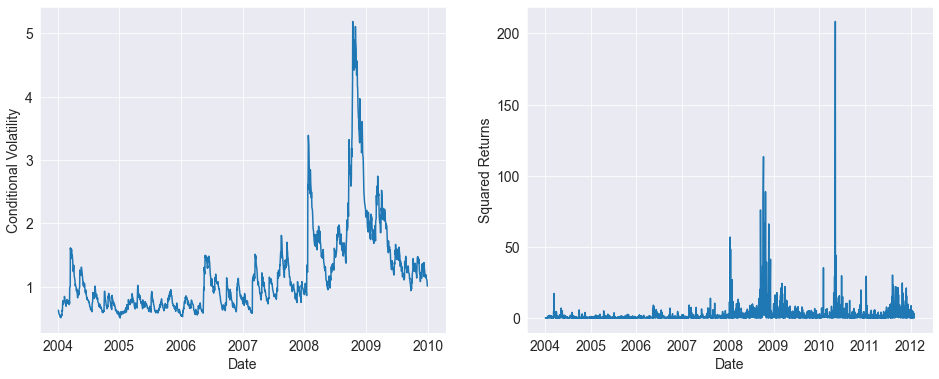

In [319]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(ret.index, cond_vola)
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Conditional Volatility')
ax[1].plot(ret.index, ret**2)
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Squared Returns')

## GJR GARCH (0,1) Model 

In [330]:
# Create GJR GARCH (0,1) Model
am_1 = arch_model(ret, vol="Garch", p=0, o=1, q=1, dist="skewt")
res_1 = am_1.fit(disp="off", last_obs="2010-01-01")

In [331]:
print(res_1.summary())

                         Constant Mean - GJR-GARCH Model Results                         
Dep. Variable:                         Adj Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:               -2207.35
Distribution:      Standardized Skew Student's t   AIC:                           4426.69
Method:                       Maximum Likelihood   BIC:                           4458.72
                                                   No. Observations:                 1538
Date:                           Mon, Mar 28 2022   Df Residuals:                     1537
Time:                                   10:43:57   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
------------------------------------

In [332]:
forecasts_1 = res_1.forecast(start="2010-1-1", reindex=False )
cond_mean_1 = forecasts_1.mean["2010":]
cond_var_1 = forecasts_1.variance["2010":]
q_1 = am_1.distribution.ppf([0.01, 0.05], res_1.params[-2:])
print(q_1)

[-2.67417294 -1.68933253]


In [333]:
v_1 = am_1.distribution.ppf([0.05], res_1.params[-2:])
print(v1)

[-1.68933253]


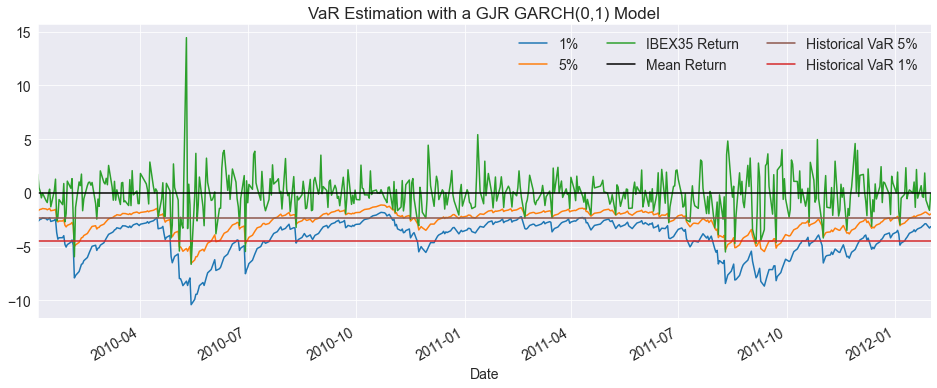

In [334]:
# Plot the VaR estimation 
value_at_risk_1 = cond_mean_1.values + np.sqrt(cond_var_1).values * q_1[None, :]
value_at_risk_1 = pd.DataFrame(value_at_risk_1, columns=["1%", "5%"], index=cond_var_1.index)
ax = value_at_risk_1.plot(legend=False)
xl = ax.set_xlim(value_at_risk_1.index[0], value_at_risk_1.index[-1])
ax_1 = rets_2010.plot(legend=False)
xl_1 = ax.set_xlim(rets_2010.index[0])
ax.set_title("VaR Estimation with a GJR GARCH(0,1) Model")
plt.axhline(mu, color = 'k', label = 'Mean Return')
plt.axhline(var_historical, color = 'C5', label = 'Historical VaR 5%')
plt.axhline(var_historical_, color = 'C3', label = 'Historical VaR 1%')
leg = ax.legend(frameon=False, ncol=3)

In [335]:
b = value_at_risk_1.drop('1%', 1)
b["Returns"] = ret["2010":"2012-01-31"].copy()
b["Violation"] = ""
b.rename(columns={'5%': 'VaR'}, inplace=True)
print(b)

                 VaR   Returns Violation
Date                                    
2010-01-04 -1.660597  1.717746          
2010-01-05 -1.593679  0.488270          
2010-01-06 -1.530638  0.148304          
2010-01-07 -1.510475 -0.459810          
2010-01-08 -1.453317 -0.027123          
...              ...       ...       ...
2012-01-25 -1.878233 -0.419024          
2012-01-26 -1.799007  1.851457          
2012-01-27 -1.786765 -0.648397          
2012-01-30 -2.045837 -1.620597          
2012-01-31 -1.959779 -0.091579          

[535 rows x 3 columns]


In [336]:
for i in b.index:
    if b.Returns[i] > b.VaR[i]:
        b.Violation[i] = 0
    else:
        b.Violation[i] = 1
print(b)

                 VaR   Returns Violation
Date                                    
2010-01-04 -1.660597  1.717746         0
2010-01-05 -1.593679  0.488270         0
2010-01-06 -1.530638  0.148304         0
2010-01-07 -1.510475 -0.459810         0
2010-01-08 -1.453317 -0.027123         0
...              ...       ...       ...
2012-01-25 -1.878233 -0.419024         0
2012-01-26 -1.799007  1.851457         0
2012-01-27 -1.786765 -0.648397         0
2012-01-30 -2.045837 -1.620597         0
2012-01-31 -1.959779 -0.091579         0

[535 rows x 3 columns]


In [338]:
np.count_nonzero(b.Violation)

13

In [339]:
#Backtest the Model for 5%
vartests.kupiec_test(b.Violation, var_conf_level=0.95, conf_level=0.95)

{'statictic test': 9.10746431775432,
 'chi square value': 0.9974543148052484,
 'null hypothesis': 'Probability of failure is 0.05',
 'result': 'Reject H0'}

In [340]:
b_1 = value_at_risk_1.drop('5%', 1)
b_1["Returns"] = ret["2010":"2012-01-31"].copy()
b_1["Violation"] = ""
b_1.rename(columns={'1%': 'VaR'}, inplace=True)
print(b_1)

                 VaR   Returns Violation
Date                                    
2010-01-04 -2.659738  1.717746          
2010-01-05 -2.553808  0.488270          
2010-01-06 -2.454016  0.148304          
2010-01-07 -2.422099 -0.459810          
2010-01-08 -2.331619 -0.027123          
...              ...       ...       ...
2012-01-25 -3.004251 -0.419024          
2012-01-26 -2.878838  1.851457          
2012-01-27 -2.859458 -0.648397          
2012-01-30 -3.269564 -1.620597          
2012-01-31 -3.133336 -0.091579          

[535 rows x 3 columns]


In [342]:
for i in b_1.index:
    if b_1.Returns[i] > b_1.VaR[i]:
        b_1.Violation[i] = 0
    else:
        b_1.Violation[i] = 1
print(b_1)

                 VaR   Returns Violation
Date                                    
2010-01-04 -2.659738  1.717746         0
2010-01-05 -2.553808  0.488270         0
2010-01-06 -2.454016  0.148304         0
2010-01-07 -2.422099 -0.459810         0
2010-01-08 -2.331619 -0.027123         0
...              ...       ...       ...
2012-01-25 -3.004251 -0.419024         0
2012-01-26 -2.878838  1.851457         0
2012-01-27 -2.859458 -0.648397         0
2012-01-30 -3.269564 -1.620597         0
2012-01-31 -3.133336 -0.091579         0

[535 rows x 3 columns]


In [344]:
np.count_nonzero(b_1.Violation)

0

In [345]:
# Backtest the model for 1%
vartests.kupiec_test(b_1.Violation, var_conf_level=0.95, conf_level=0.95)

{'statictic test': -0.0,
 'chi square value': 0.0,
 'null hypothesis': 'Probability of failure is 0.05',
 'result': 'Fail to reject H0'}

## EGARCH (1,1) Model 

In [346]:
# Create the EGARCH(1,1) Model
am_2 = arch_model(ret, vol="EGarch", p=1, o=0, q=1, dist="skewt")
res_2 = am_2.fit(disp="off", last_obs="2010-01-01")

In [347]:
print(res_2.summary())

                           Constant Mean - EGARCH Model Results                          
Dep. Variable:                         Adj Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                EGARCH   Log-Likelihood:               -2233.02
Distribution:      Standardized Skew Student's t   AIC:                           4478.03
Method:                       Maximum Likelihood   BIC:                           4510.06
                                                   No. Observations:                 1538
Date:                           Mon, Mar 28 2022   Df Residuals:                     1537
Time:                                   10:46:11   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

In [349]:
forecasts_2 = res_2.forecast(start="2010-1-1", reindex=False )
cond_mean_2 = forecasts_2.mean["2010":]
cond_var_2 = forecasts_2.variance["2010":]
q_2 = am_2.distribution.ppf([0.01, 0.05], res_2.params[-2:])
print(q_2)

[-2.68181078 -1.66272644]


In [350]:
v_2 = am_2.distribution.ppf([0.05], res_2.params[-2:])
print(v_2)

[-1.66272644]


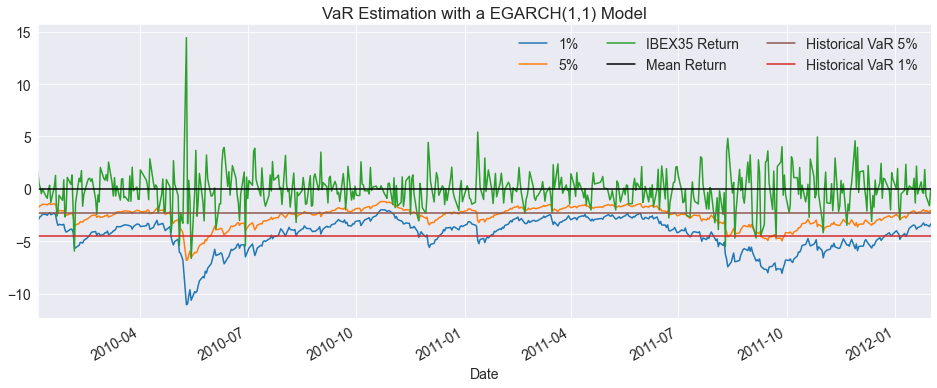

In [354]:
value_at_risk_2 = cond_mean_2.values + np.sqrt(cond_var_2).values * q_2[None, :]
value_at_risk_2 = pd.DataFrame(value_at_risk_2, columns=["1%", "5%"], index=cond_var_2.index)
ax = value_at_risk_2.plot(legend=False)
xl = ax.set_xlim(value_at_risk_2.index[0], value_at_risk_2.index[-1])
ax_1 = rets_2010.plot(legend=False)
xl_1 = ax.set_xlim(rets_2010.index[0])
ax.set_title("VaR Estimation with a EGARCH(1,1) Model")
plt.axhline(mu, color = 'k', label = 'Mean Return')
plt.axhline(var_historical, color = 'C5', label = 'Historical VaR 5%')
plt.axhline(var_historical_, color = 'C3', label = 'Historical VaR 1%')
leg = ax.legend(frameon=False, ncol=3)

In [355]:
c = value_at_risk_2.drop('1%', 1)
c["Returns"] = ret["2010":"2012-01-31"].copy()
c["Violation"] = ""
c.rename(columns={'5%': 'VaR'}, inplace=True)
print(c)

                 VaR   Returns Violation
Date                                    
2010-01-04 -1.803647  1.717746          
2010-01-05 -1.728935  0.488270          
2010-01-06 -1.606403  0.148304          
2010-01-07 -1.569607 -0.459810          
2010-01-08 -1.466224 -0.027123          
...              ...       ...       ...
2012-01-25 -1.988232 -0.419024          
2012-01-26 -2.129562  1.851457          
2012-01-27 -2.078921 -0.648397          
2012-01-30 -2.198782 -1.620597          
2012-01-31 -2.052710 -0.091579          

[535 rows x 3 columns]


In [356]:
for i in c.index:
    if c.Returns[i] > c.VaR[i]:
        c.Violation[i] = 0
    else:
        c.Violation[i] = 1
print(c)

                 VaR   Returns Violation
Date                                    
2010-01-04 -1.803647  1.717746         0
2010-01-05 -1.728935  0.488270         0
2010-01-06 -1.606403  0.148304         0
2010-01-07 -1.569607 -0.459810         0
2010-01-08 -1.466224 -0.027123         0
...              ...       ...       ...
2012-01-25 -1.988232 -0.419024         0
2012-01-26 -2.129562  1.851457         0
2012-01-27 -2.078921 -0.648397         0
2012-01-30 -2.198782 -1.620597         0
2012-01-31 -2.052710 -0.091579         0

[535 rows x 3 columns]


In [357]:
print(np.count_nonzero(c.Violation))

27


In [358]:
# Backtest the Model for 5%
vartests.kupiec_test(c.Violation, var_conf_level=0.95, conf_level=0.95)

{'statictic test': 0.0024521949112212837,
 'chi square value': 0.03949481538892661,
 'null hypothesis': 'Probability of failure is 0.05',
 'result': 'Fail to reject H0'}

In [359]:
c_1 = value_at_risk_2.drop('5%', 1)
c_1["Returns"] = ret["2010":"2012-01-31"].copy()
c_1["Violation"] = ""
c_1.rename(columns={'1%': 'VaR'}, inplace=True)
print(c_1)

                 VaR   Returns Violation
Date                                    
2010-01-04 -2.957869  1.717746          
2010-01-05 -2.837366  0.488270          
2010-01-06 -2.639734  0.148304          
2010-01-07 -2.580385 -0.459810          
2010-01-08 -2.413640 -0.027123          
...              ...       ...       ...
2012-01-25 -3.255586 -0.419024          
2012-01-26 -3.483536  1.851457          
2012-01-27 -3.401858 -0.648397          
2012-01-30 -3.595181 -1.620597          
2012-01-31 -3.359583 -0.091579          

[535 rows x 3 columns]


In [360]:
for i in c_1.index:
    if c_1.Returns[i] > c_1.VaR[i]:
        c_1.Violation[i] = 0
    else:
        c_1.Violation[i] = 1
print(c_1)

                 VaR   Returns Violation
Date                                    
2010-01-04 -2.957869  1.717746         0
2010-01-05 -2.837366  0.488270         0
2010-01-06 -2.639734  0.148304         0
2010-01-07 -2.580385 -0.459810         0
2010-01-08 -2.413640 -0.027123         0
...              ...       ...       ...
2012-01-25 -3.255586 -0.419024         0
2012-01-26 -3.483536  1.851457         0
2012-01-27 -3.401858 -0.648397         0
2012-01-30 -3.595181 -1.620597         0
2012-01-31 -3.359583 -0.091579         0

[535 rows x 3 columns]


In [361]:
print(np.count_nonzero(c_1.Violation))

1


In [362]:
# Backtest the model for 1%
vartests.kupiec_test(c_1.Violation, var_conf_level=0.99, conf_level=0.95)

{'statictic test': 5.381435894276812,
 'chi square value': 0.9796478792650968,
 'null hypothesis': 'Probability of failure is 0.01',
 'result': 'Reject H0'}

## APARCH(1,1) Model

In [363]:
# Create the APARCH (1,1) Model
am_3 = arch_model(ret, vol="Aparch", p=1, o=1, q=1, dist="skewt")
res_3 = am_3.fit(disp="off", last_obs="2010-01-31")

In [364]:
print(res_3.summary())

                           Constant Mean - APARCH Model Results                          
Dep. Variable:                         Adj Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                APARCH   Log-Likelihood:               -2237.87
Distribution:      Standardized Skew Student's t   AIC:                           4491.74
Method:                       Maximum Likelihood   BIC:                           4534.55
                                                   No. Observations:                 1558
Date:                           Mon, Mar 28 2022   Df Residuals:                     1557
Time:                                   10:55:08   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
------------------------------------

In [365]:
forecasts_3 = res_3.forecast(start="2010-1-1", reindex=False )
cond_mean_3 = forecasts_3.mean["2010":]
cond_var_3 = forecasts_3.variance["2010":]
q_3 = am_3.distribution.ppf([0.01, 0.05], res_3.params[-2:])
print(q_3)

[-2.67885241 -1.69534565]


In [366]:
v_3 = am_3.distribution.ppf([0.05], res_3.params[-2:])
print(v_3)

[-1.69534565]


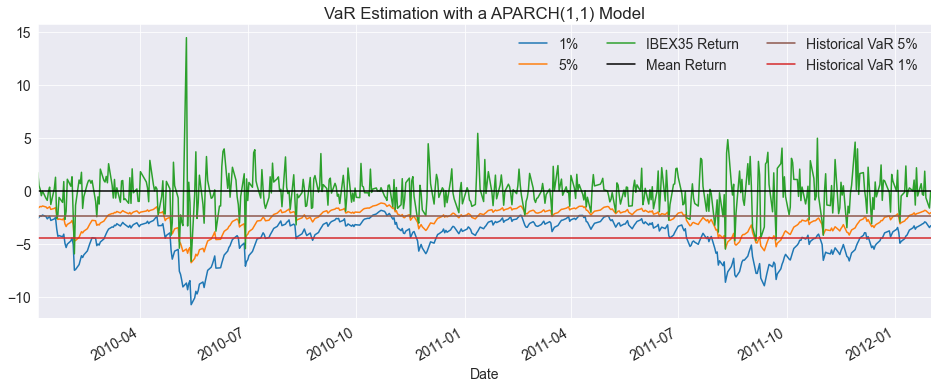

In [369]:
# Plot the Returns and estimated VaR for 5% and 1%
value_at_risk_3 = cond_mean_3.values + np.sqrt(cond_var_3).values * q_3[None, :]
value_at_risk_3 = pd.DataFrame(value_at_risk_3, columns=["1%", "5%"], index=cond_var_3.index)
ax = value_at_risk_3.plot(legend=False)
xl = ax.set_xlim(value_at_risk_3.index[0], value_at_risk_3.index[-1])
ax_1 = rets_2010.plot(legend=False)
xl_1 = ax.set_xlim(rets_2010.index[0])
ax.set_title("VaR Estimation with a APARCH(1,1) Model")
plt.axhline(mu, color = 'k', label = 'Mean Return')
plt.axhline(var_historical, color = 'C5', label = 'Historical VaR 5%')
plt.axhline(var_historical_, color = 'C3', label = 'Historical VaR 1%')
leg = ax.legend(frameon=False, ncol=3)

In [370]:
d = value_at_risk_3.drop('1%', 1)
d["Returns"] = ret["2010":"2012-01-31"].copy()
d["Violation"] = ""
d.rename(columns={'5%': 'VaR'}, inplace=True)
print(d)

                 VaR   Returns Violation
Date                                    
2010-01-04 -1.638615  1.717746          
2010-01-05 -1.554403  0.488270          
2010-01-06 -1.474334  0.148304          
2010-01-07 -1.496655 -0.459810          
2010-01-08 -1.428587 -0.027123          
...              ...       ...       ...
2012-01-25 -1.927201 -0.419024          
2012-01-26 -1.833289  1.851457          
2012-01-27 -1.869586 -0.648397          
2012-01-30 -2.173746 -1.620597          
2012-01-31 -2.065335 -0.091579          

[535 rows x 3 columns]


In [371]:
for i in d.index:
    if d.Returns[i] > d.VaR[i]:
        d.Violation[i] = 0
    else:
        d.Violation[i] = 1
print(d)

                 VaR   Returns Violation
Date                                    
2010-01-04 -1.638615  1.717746         0
2010-01-05 -1.554403  0.488270         0
2010-01-06 -1.474334  0.148304         0
2010-01-07 -1.496655 -0.459810         0
2010-01-08 -1.428587 -0.027123         0
...              ...       ...       ...
2012-01-25 -1.927201 -0.419024         0
2012-01-26 -1.833289  1.851457         0
2012-01-27 -1.869586 -0.648397         0
2012-01-30 -2.173746 -1.620597         0
2012-01-31 -2.065335 -0.091579         0

[535 rows x 3 columns]


In [372]:
print(np.count_nonzero(d.Violation))

11


In [378]:
# Backtest the Model for 5%
vartests.kupiec_test(d.Violation, var_conf_level=0.95, conf_level=0.95)

{'statictic test': 12.433044527630123,
 'chi square value': 0.9995781962712873,
 'null hypothesis': 'Probability of failure is 0.05',
 'result': 'Reject H0'}

In [374]:
d_1 = value_at_risk_3.drop('5%', 1)
d_1["Returns"] = ret["2010":"2012-01-31"].copy()
d_1["Violation"] = ""
d_1.rename(columns={'1%': 'VaR'}, inplace=True)
print(d_1)

                 VaR   Returns Violation
Date                                    
2010-01-04 -2.614991  1.717746          
2010-01-05 -2.481925  0.488270          
2010-01-06 -2.355406  0.148304          
2010-01-07 -2.390677 -0.459810          
2010-01-08 -2.283121 -0.027123          
...              ...       ...       ...
2012-01-25 -3.070992 -0.419024          
2012-01-26 -2.922599  1.851457          
2012-01-27 -2.979953 -0.648397          
2012-01-30 -3.460563 -1.620597          
2012-01-31 -3.289260 -0.091579          

[535 rows x 3 columns]


In [375]:
for i in d_1.index:
    if d_1.Returns[i] > d_1.VaR[i]:
        d_1.Violation[i] = 0
    else:
        d_1.Violation[i] = 1
print(d_1)

                 VaR   Returns Violation
Date                                    
2010-01-04 -2.614991  1.717746         0
2010-01-05 -2.481925  0.488270         0
2010-01-06 -2.355406  0.148304         0
2010-01-07 -2.390677 -0.459810         0
2010-01-08 -2.283121 -0.027123         0
...              ...       ...       ...
2012-01-25 -3.070992 -0.419024         0
2012-01-26 -2.922599  1.851457         0
2012-01-27 -2.979953 -0.648397         0
2012-01-30 -3.460563 -1.620597         0
2012-01-31 -3.289260 -0.091579         0

[535 rows x 3 columns]


In [376]:
print(np.count_nonzero(d_1.Violation))

0


In [379]:
# Backtest the Model for 1%
vartests.kupiec_test(d_1.Violation, var_conf_level=0.99, conf_level=0.95)

{'statictic test': -0.0,
 'chi square value': 0.0,
 'null hypothesis': 'Probability of failure is 0.01',
 'result': 'Fail to reject H0'}